In [117]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

In [118]:
#2
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [119]:
#3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [120]:
#4
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [121]:
#5
print(df.dtypes)

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


In [122]:
#6
print(df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [123]:
#7
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [124]:
#8
df.duplicated().sum()

0

In [125]:
#9
df.rename(columns = { 'Na_to_K': 'Sodium_to_Potassium', 'BP': 'Blood_Pressure'}, inplace = True)
df['Sex'].replace({'M': 'Male', 'F': 'Female'}, inplace = True)
df['Sodium_to_Potassium '] = df ['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype(int)

In [126]:
#10
age_values = df ['Age'].value_counts()
top_age = age_values.head(5)
df_top_age = pd. DataFrame({'Age': top_age.index, 'Count': top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,39,6


C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\3986742880.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)


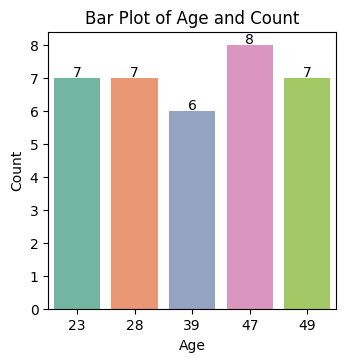

In [127]:
#11
#EDA
def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'):
    if plot_type == 'count':
        sns.countplot(x=x, data=data, palette=palette, ax=ax)
    elif plot_type == 'bar':
        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)

    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='baseline',
            fontsize=10, color="black",
            xytext=(0, 1), 
            textcoords='offset points')
        
# Create the figure and subplots
plt.figure(figsize=(10, 10))

# Define plot configurations
plot_configs = [
    {'x': 'Sex', 'data': df, 'plot_type': 'count'},
    {'x': 'Blood_Pressure', 'data': df, 'plot_type': 'count'},
    {'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},
    {'x': 'Drug', 'data': df, 'plot_type': 'count'}, 
    {'x': 'Age', 'y': 'Count', 'data': df_top_age, 'plot_type': 'bar'}
]

# Loop through plot configurations to create subplots
for i, config in enumerate (plot_configs):
    ax = plt.subplot(3, 3, 1+1)
create_plot(ax, **config)

plt.tight_layout()
plt.show()

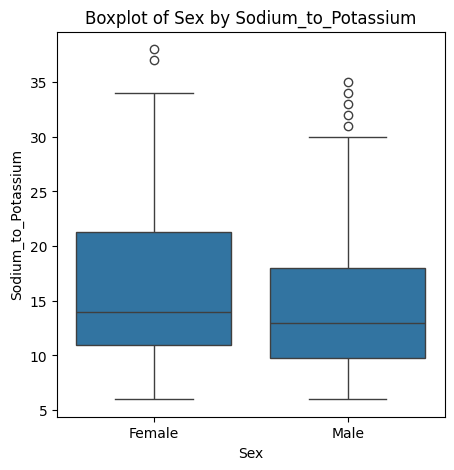

In [128]:
#12
plt.figure(figsize=(5, 5))
sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df)
plt.title('Boxplot of Sex by Sodium_to_Potassium')
plt.show()

In [129]:
#13
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [130]:
#14
#OneHot Encoder
onehot_encoder_sex = OneHotEncoder(sparse_output=False)
one_hot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])
one_hot_df = pd. DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex'])) 
X = pd.concat([X, one_hot_df], axis=1)
X = X.drop('Sex', axis=1) # Drop the original categorical columns

# Labelled encoder
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure'])
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])

In [131]:
# Mã hóa các cột chuỗi trong X (nếu có cột chuỗi)
label_encoder = LabelEncoder()

# Lặp qua các cột và mã hóa nếu phát hiện dữ liệu kiểu chuỗi
for column in X.columns:
    if X[column].dtype == 'object':  # Kiểm tra nếu là kiểu chuỗi
        X[column] = label_encoder.fit_transform(X[column])

# Mã hóa nhãn y nếu cần (ví dụ nếu y là dữ liệu chuỗi)
y = label_encoder.fit_transform(y)

In [132]:
#15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [133]:
#16
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [134]:
#17
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [135]:
#18
print("Danh sách các lớp mục tiêu phân loại:", dtc.classes_)

Danh sách các lớp mục tiêu phân loại: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19 20 21 22 23 25 26 27
 29 31]
